<a href="https://colab.research.google.com/github/armandordorica/Twitter_Sentiment_Analysis/blob/master/model_comparisons/twitter_data_with_covid_cases_combined_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Dependencies

In [0]:
import numpy as np
import pandas as pd

from pandas import read_csv

In [47]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
series = read_csv(url, header=0)
series[series['Combined_Key'].str.match('New York')]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20
1863,84036061.0,US,USA,840,36061.0,New York,New York,US,40.767273,-73.971526,"New York City, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12,19,25,55,95,154,269,269,463,814,1871,3954,5151,7530,9654,12305,14904,17856,21873,25573,29776,33768,37453,43119,47439,51809,57159,63306,67551,72181,76876,81803,87028,92384,98308,103208,106763,110465,118302,123146


In [0]:
df = pd.DataFrame(series)
df_ny = df.iloc[1863]
df_ny = pd.DataFrame(df_ny)
df_ny = df_ny.T

In [50]:
df_ny

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20
1863,8.40361e+07,US,USA,840,36061,New York,New York,US,40.7673,-73.9715,"New York City, New York, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12,19,25,55,95,154,269,269,463,814,1871,3954,5151,7530,9654,12305,14904,17856,21873,25573,29776,33768,37453,43119,47439,51809,57159,63306,67551,72181,76876,81803,87028,92384,98308,103208,106763,110465,118302,123146


In [51]:
cols = list(df_ny.columns)
df_ny = df_ny[cols[10:]]
df_ny.columns

Index(['Combined_Key', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20',
       '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20',
       '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20',
       '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20',
       '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20',
       '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20',
       '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20',
       '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20',
       '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20',
       '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20',
       '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20',
       '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20',
       '4/13/20', 

In [0]:
df_ny = df_ny[['Combined_Key','3/4/20',
       '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20',
       '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20',
       '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20',
       '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20']]

In [56]:
df_ny = df_ny.T
df_ny

,1863
Combined_Key,"New York City, New York, US"
3/4/20,1
3/5/20,4
3/6/20,11
3/7/20,11
3/8/20,12
3/9/20,19
3/10/20,25
3/11/20,55
3/12/20,95


In [55]:
import datetime
base = datetime.datetime(2020, 3, 28)
date_list = [base - datetime.timedelta(days=x) for x in range(25)]

list_of_dates =  []
for i in range(0, len(date_list)):
  list_of_dates.append(date_list[i].strftime("%Y-%m-%d"))

list_of_dates.reverse()
list_of_dates

['2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-07',
 '2020-03-08',
 '2020-03-09',
 '2020-03-10',
 '2020-03-11',
 '2020-03-12',
 '2020-03-13',
 '2020-03-14',
 '2020-03-15',
 '2020-03-16',
 '2020-03-17',
 '2020-03-18',
 '2020-03-19',
 '2020-03-20',
 '2020-03-21',
 '2020-03-22',
 '2020-03-23',
 '2020-03-24',
 '2020-03-25',
 '2020-03-26',
 '2020-03-27',
 '2020-03-28']

In [0]:
list_of_lists = df_ny.iloc[1:].values
flattened_values  = [val for sublist in list_of_lists for val in sublist]

In [62]:
len(flattened_values)

25

In [63]:
len(list_of_dates)

25

In [0]:
d = {'date': list_of_dates, 'Num of Cases in NY': flattened_values}

In [0]:
df = pd.DataFrame(data=d)

In [66]:
df

,date,Num of Cases in NY
0,2020-03-04,1
1,2020-03-05,4
2,2020-03-06,11
3,2020-03-07,11
4,2020-03-08,12
5,2020-03-09,19
6,2020-03-10,25
7,2020-03-11,55
8,2020-03-12,95
9,2020-03-13,154


### Getting Twitter data

In [0]:
url = "https://raw.githubusercontent.com/armandordorica/Twitter_Sentiment_Analysis/master/sentiment_analysis_time_series_nyc_twitter.csv"

In [68]:
from pandas import read_csv
twitter_df = read_csv(url, header=0)
twitter_df 

,date,all tweets,positive tweets,negative tweets,neutral tweets,Total
0,2020-03-04,17,7,2,8,17
1,2020-03-05,30,5,8,17,30
2,2020-03-06,15,9,2,4,15
3,2020-03-07,9,3,1,5,9
4,2020-03-08,13,4,5,4,13
5,2020-03-09,71,22,17,32,71
6,2020-03-10,287,127,67,93,287
7,2020-03-11,438,175,106,157,438
8,2020-03-12,975,393,207,375,975
9,2020-03-13,1712,794,383,535,1712


In [69]:
merged_df = pd.merge(df, twitter_df, on='date', how='left')
merged_df

,date,Num of Cases in NY,all tweets,positive tweets,negative tweets,neutral tweets,Total
0,2020-03-04,1,17,7,2,8,17
1,2020-03-05,4,30,5,8,17,30
2,2020-03-06,11,15,9,2,4,15
3,2020-03-07,11,9,3,1,5,9
4,2020-03-08,12,13,4,5,4,13
5,2020-03-09,19,71,22,17,32,71
6,2020-03-10,25,287,127,67,93,287
7,2020-03-11,55,438,175,106,157,438
8,2020-03-12,95,975,393,207,375,975
9,2020-03-13,154,1712,794,383,535,1712


In [0]:
merged_df = merged_df.set_index('date')

In [101]:
merged_df = merged_df[['Num of Cases in NY','positive tweets',
       'negative tweets', 'neutral tweets', 'Total']]
merged_df['log_cases'] = np.log(merged_df['Num of Cases in NY'])
merged_df

,Num of Cases in NY,positive tweets,negative tweets,neutral tweets,Total,log_cases
date,,,,,,
2020-03-04,1,7,2,8,17,0.000000
2020-03-05,4,5,8,17,30,1.386294
2020-03-06,11,9,2,4,15,2.397895
2020-03-07,11,3,1,5,9,2.397895
2020-03-08,12,4,5,4,13,2.484907
2020-03-09,19,22,17,32,71,2.944439
2020-03-10,25,127,67,93,287,3.218876
2020-03-11,55,175,106,157,438,4.007333
2020-03-12,95,393,207,375,975,4.553877


In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(merged_df))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [106]:
merged_df

,Num of Cases in NY,positive tweets,negative tweets,neutral tweets,Total,log_cases
date,,,,,,
2020-03-04,1,7,2,8,17,0.000000
2020-03-05,4,5,8,17,30,1.386294
2020-03-06,11,9,2,4,15,2.397895
2020-03-07,11,3,1,5,9,2.397895
2020-03-08,12,4,5,4,13,2.484907
2020-03-09,19,22,17,32,71,2.944439
2020-03-10,25,127,67,93,287,3.218876
2020-03-11,55,175,106,157,438,4.007333
2020-03-12,95,393,207,375,975,4.553877


In [0]:


from google.colab import files
merged_df_scaled.to_csv('scaled_nyc_twitter_data.csv')
files.download('scaled_nyc_twitter_data.csv')

In [0]:
merged_df_scaled = scaler.fit_transform(merged_df[['positive tweets',
       'negative tweets', 'neutral tweets', 'Total', 'log_cases']])

In [0]:
merged_df_scaled = pd.DataFrame(merged_df_scaled, index = merged_df.index, columns=['positive tweets',
       'negative tweets', 'neutral tweets', 'Total', 'log_cases'])

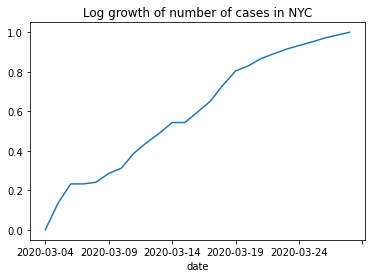

In [114]:
merged_df_scaled['log_cases'].plot( title="Log growth of number of cases in NYC")

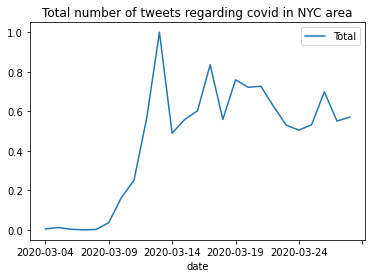

In [115]:
merged_df_scaled[['Total']].plot(title= 'Total number of tweets regarding covid in NYC area')

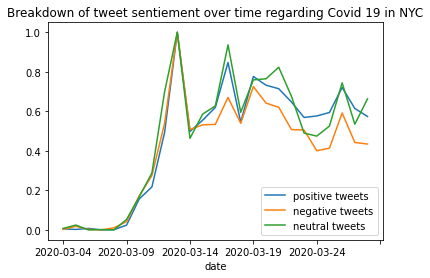

In [116]:
merged_df_scaled[['positive tweets',
       'negative tweets', 'neutral tweets']].plot(title= 'Breakdown of tweet sentiement over time regarding Covid 19 in NYC')

In [117]:
# generate random integer values
from random import seed
from random import randint
# seed random number generator
seed(1)
test_indices = []
# generate some integers
for _ in range(8):
  value = randint(0, 24)
  test_indices.append(value)
  print(value)

4
18
24
2
8
3
15
24


In [118]:
test_indices

[4, 18, 24, 2, 8, 3, 15, 24]

In [0]:
import numpy as np
all_indices = list(np.arange(0,24))

In [0]:
train_indices = list(set(all_indices) - set(test_indices))

In [0]:
train = merged_df_scaled.iloc[train_indices]

In [0]:
test = merged_df_scaled.iloc[test_indices]

In [0]:
X_train = train[['positive tweets', 'negative tweets',
       'neutral tweets', 'Total']]

In [0]:
X_train =  X_train.sort_index()

In [0]:
X_test = test[['positive tweets', 'negative tweets',
       'neutral tweets', 'Total']]

In [0]:
X_test =  X_test.sort_index()

In [126]:
X_test

,positive tweets,negative tweets,neutral tweets,Total
date,,,,
2020-03-06,0.007585,0.002618,0.000000,0.003523
2020-03-07,0.000000,0.000000,0.001883,0.000000
2020-03-08,0.001264,0.010471,0.000000,0.002349
2020-03-12,0.493047,0.539267,0.698682,0.567234
2020-03-19,0.776233,0.725131,0.758945,0.759248
2020-03-22,0.647282,0.507853,0.676083,0.624780
2020-03-28,0.573957,0.434555,0.662900,0.570170
2020-03-28,0.573957,0.434555,0.662900,0.570170


In [127]:
X_train

,positive tweets,negative tweets,neutral tweets,Total
date,,,,
2020-03-04,0.005057,0.002618,0.007533,0.004698
2020-03-05,0.002528,0.018325,0.024482,0.012331
2020-03-09,0.024020,0.041885,0.052731,0.036406
2020-03-10,0.156764,0.172775,0.167608,0.163241
2020-03-11,0.217446,0.274869,0.288136,0.251908
2020-03-13,1.000000,1.000000,1.000000,1.000000
2020-03-14,0.498104,0.507853,0.463277,0.489137
2020-03-15,0.554994,0.531414,0.585687,0.559014
2020-03-16,0.619469,0.534031,0.627119,0.602466


In [129]:
merged_df_scaled.columns

Index(['positive tweets', 'negative tweets', 'neutral tweets', 'Total',
       'log_cases'],
      dtype='object')

In [0]:
Y_train = train[['log_cases']]

In [0]:
Y_train =  Y_train.sort_index()

In [0]:
Y_test =  test[['log_cases']]

In [0]:
Y_test =  Y_test.sort_index()

### Defining model

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [0]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [136]:
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
Y_pred = regr.predict(X_test)


In [138]:
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_pred))

Coefficients: 
 [[ 2.73519202 -1.80344317 -1.00281688  0.55321541]]
Mean squared error: 0.03


In [0]:
Y_test = Y_test.sort_index()

In [140]:
Y_test

,log_cases
date,
2020-03-06,0.232772
2020-03-07,0.232772
2020-03-08,0.241219
2020-03-12,0.442061
2020-03-19,0.804011
2020-03-22,0.890663
2020-03-28,1.000000
2020-03-28,1.000000


In [143]:
list(Y_test['log_cases'])

[0.23277241704174798,
 0.23277241704174798,
 0.24121892793059524,
 0.4420613956719504,
 0.8040107546630423,
 0.8906630144033427,
 1.0,
 1.0]

In [0]:
list_of_lists = list(Y_pred)

In [0]:
Y_pred  = [val for sublist in list_of_lists for val in sublist]

In [0]:
results = pd.DataFrame({'Y_true':list(Y_test['log_cases']), 
              'Y_pred': Y_pred})

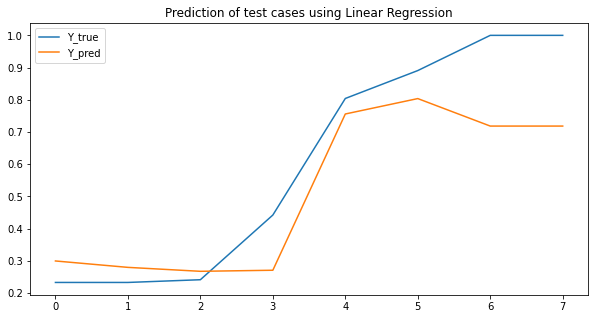

In [176]:
results.plot(title = 'Prediction of test cases using Linear Regression', figsize = (10,5), fontsize = 10)


In [0]:
Y_pred_all = regr.predict(merged_df_scaled[['positive tweets', 'negative tweets',
       'neutral tweets', 'Total']])


In [0]:
list_of_lists = list(Y_pred_all)
Y_pred_all = [val for sublist in list_of_lists for val in sublist]

In [0]:
results_all = pd.DataFrame({'Y_true':list(merged_df_scaled['log_cases']), 
              'Y_pred_all': Y_pred_all})
results_all.index = merged_df_scaled.index

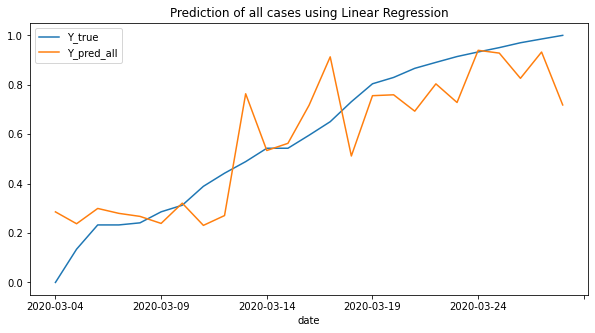

In [177]:
results_all.plot(title = 'Prediction of all cases using Linear Regression', figsize = (10,5), fontsize = 10)


In [174]:
results_all

,Y_true,Y_pred_all
date,,
2020-03-04,0.000000,0.285631
2020-03-05,0.134573,0.237615
2020-03-06,0.232772,0.299451
2020-03-07,0.232772,0.279587
2020-03-08,0.241219,0.267349
2020-03-09,0.285827,0.238900
2020-03-10,0.312468,0.320892
2020-03-11,0.389006,0.230935
2020-03-12,0.442061,0.270669


In [179]:
inverted_df = scaler.inverse_transform(merged_df_scaled)

merged_pd.DataFrame(inverted_df, index = merged_df_scaled.index, columns=['positive tweets',
       'negative tweets', 'neutral tweets', 'Total', 'log_cases'])

,positive tweets,negative tweets,neutral tweets,Total,log_cases
date,,,,,
2020-03-04,7.0,2.0,8.0,17.0,0.000000
2020-03-05,5.0,8.0,17.0,30.0,1.386294
2020-03-06,9.0,2.0,4.0,15.0,2.397895
2020-03-07,3.0,1.0,5.0,9.0,2.397895
2020-03-08,4.0,5.0,4.0,13.0,2.484907
2020-03-09,22.0,17.0,32.0,71.0,2.944439
2020-03-10,127.0,67.0,93.0,287.0,3.218876
2020-03-11,175.0,106.0,157.0,438.0,4.007333
2020-03-12,393.0,207.0,375.0,975.0,4.553877


In [0]:
merged_df_scaled = scaler.fit_transform(merged_df[['positive tweets',
       'negative tweets', 'neutral tweets', 'Total', 'log_cases']])

In [180]:
regr.coef_

array([[ 2.73519202, -1.80344317, -1.00281688,  0.55321541]])